# Predicting fraudulent transactions for a financial company 


In [1]:
# Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data1 = pd.read_csv(r"C:\Users\prasa\Downloads\Fraud.csv") # Reading the Data
data1.head()# it will give you first 5 rows

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\prasa\\Downloads\\Fraud.csv'

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [9]:
data1.values

array([[1, 'PAYMENT', 9839.64, ..., 0.0, 0, 0],
       [1, 'PAYMENT', 1864.28, ..., 0.0, 0, 0],
       [1, 'TRANSFER', 181.0, ..., 0.0, 1, 0],
       ...,
       [743, 'CASH_OUT', 6311409.28, ..., 6379898.11, 1, 0],
       [743, 'TRANSFER', 850002.52, ..., 0.0, 1, 0],
       [743, 'CASH_OUT', 850002.52, ..., 7360101.63, 1, 0]], dtype=object)

In [10]:
####Check the Duplicate Columns

In [11]:
data1.columns.duplicated().sum()

0

In [12]:
data1.index

RangeIndex(start=0, stop=6362620, step=1)

In [13]:
data1.shape

(6362620, 11)

In [15]:
data1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Domain Analysis

##### Develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.

### Data Dictionary:

*step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

*type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

*amount - amount of the transaction in local currency.

*nameOrig - customer who started the transaction

*oldbalanceOrg - initial balance before the transaction

*newbalanceOrig - new balance after the transaction

*nameDest - customer who is the recipient of the transaction

*oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

*newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

*isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

*isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# EXPLORATORY DATA ANALYSIS

#### Checking the statistical information

In [17]:
data1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Univariate Analysis

In [18]:
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
data1.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

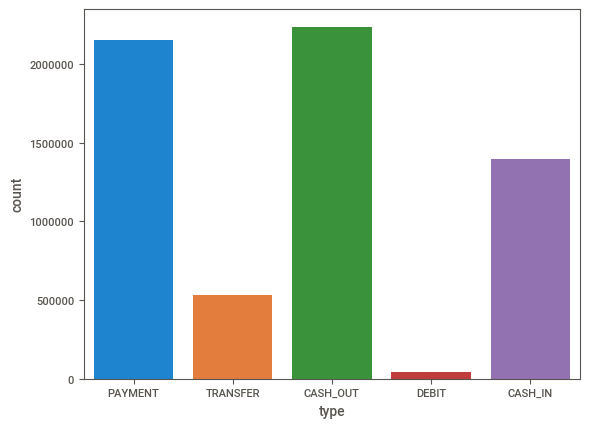

In [23]:
sns.countplot(data = data1, x = 'type', label='Count')

data1['type'].value_counts()